In [19]:
import nltk, re, pprint
from nltk import word_tokenize
import re
import string

In [22]:
file = open('aesop.txt')

text = ''

for line in file:
    if line != "[Illustration]\n":
        text += line.replace('\n',' ').replace('\"', '').replace('!','.').replace('?','.').replace(',','')
        if len(text.split())> 990:
            break
sentences = text.split('.')
sentences = [x.lower().strip(string.whitespace) for x in sentences]
tokenized = [re.findall(r'[\w]+',sentence) for sentence in sentences]
tokens = [item for sublist in tokenized for item in sublist]




In [23]:
# Number of words
length = [len(x) for x in tokenized]
length = sum(length)
print("Number of words: ", length)

# No sentences
no_sentences = len(sentences)
print("Number of sentences: ", no_sentences)

# Hapaxes
count = {}
for sentence in tokenized:
    for word in sentence:
        if word in count:
            count[word] += 1
        else:
            count[word] = 1

hapaxes = []
for word in count.keys():
    if count[word] == 1:
        hapaxes.append(word)
print("No. of hapaxes: ",len(hapaxes))

# Lemmas
wnl = nltk.WordNetLemmatizer()
lemmas = {wnl.lemmatize(t) for t in tokens}
print("Size of Vocabulary: ",len(lemmas))

# Length of sentences
print("Length of sentences: ", length/(no_sentences))

# Most frequent words
freq = dict()
for word in tokens:
    w = wnl.lemmatize(word)
    if w in freq:
        freq[w] += 1
    else:
        freq[w] = 1
freq = list(freq.items())
freq.sort(reverse = True, key = lambda x: x[1])
print(freq[:10])


Number of words:  994
Number of sentences:  63
No. of hapaxes:  288
Size of Vocabulary:  411
Length of sentences:  15.777777777777779
[('the', 86), ('a', 46), ('and', 34), ('to', 31), ('of', 23), ('he', 22), ('him', 14), ('in', 14), ('his', 14), ('with', 10)]


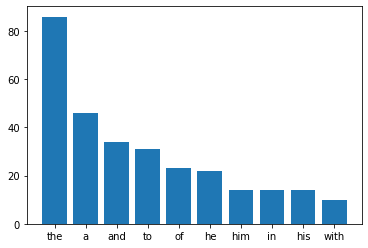

In [9]:
import matplotlib.pyplot as plt

frequencies = [x[1] for x in freq]
lab = [x[0] for x in freq]

plt.bar(lab[:10],frequencies[:10])
plt.show()

In [9]:
# No of spelling mistakes
f = open('wordlist.txt')
wordlist = []
for word in f:
    wordlist.append(word)
wordlist = set(wordlist)
misspelled = []
for word in tokens:
    if word not in wordlist:
        misspelled.append(word)
print(word)

its


In [8]:
print(len(sentences), len(tokenized))

63 63


In [25]:
for sentence in sentences:
    print(sentence)

the wolf turned shepherd
a wolf finding that the sheep were so afraid of him that he could not get near them disguised himself in the dress of a shepherd and thus attired approached the flock
as he came near he found the shepherd fast asleep
as the sheep did not run away he resolved to imitate the voice of the shepherd
in trying to do so he only howled and awoke the shepherd
as he could not run away he was soon killed
those who attempt to act in disguise are apt to overdo it
the stag at the pool
a stag saw his shadow reflected in the water and greatly admired the size of his horns but felt angry with himself for having such weak feet
while he was thus contemplating himself a lion appeared at the pool
the stag betook himself to flight and kept himself with ease at a safe distance from the lion until he entered a wood and became entangled with his horns
the lion quickly came up with him and caught him
when too late he thus reproached himself: woe is me
how have i deceived myself
these fe

In [10]:

marked = [nltk.pos_tag(text) for text in tokenized]


In [11]:
freq_per_cat = {}
marked = [nltk.pos_tag(text) for text in tokenized]
for sentence in marked:
    #{NN: {word: freq}}
    for word in sentence:
        if word[1] in freq_per_cat:
            if word[0] in freq_per_cat[word[1]]:
                freq_per_cat[word[1]][word[0]] += 1
            else:
                freq_per_cat[word[1]][word[0]] = 1
        else:
            freq_per_cat[word[1]] = {word[0] : 1}
            
print(marked)

[[('the', 'DT'), ('wolf', 'NN'), ('turned', 'VBD'), ('shepherd', 'JJ')], [('a', 'DT'), ('wolf', 'NN'), ('finding', 'VBG'), ('that', 'IN'), ('the', 'DT'), ('sheep', 'NN'), ('were', 'VBD'), ('so', 'RB'), ('afraid', 'JJ'), ('of', 'IN'), ('him', 'PRP'), ('that', 'IN'), ('he', 'PRP'), ('could', 'MD'), ('not', 'RB'), ('get', 'VB'), ('near', 'IN'), ('them', 'PRP'), ('disguised', 'VBD'), ('himself', 'PRP'), ('in', 'IN'), ('the', 'DT'), ('dress', 'NN'), ('of', 'IN'), ('a', 'DT'), ('shepherd', 'NN'), ('and', 'CC'), ('thus', 'RB'), ('attired', 'VBN'), ('approached', 'VBD'), ('the', 'DT'), ('flock', 'NN')], [('as', 'IN'), ('he', 'PRP'), ('came', 'VBD'), ('near', 'IN'), ('he', 'PRP'), ('found', 'VBD'), ('the', 'DT'), ('shepherd', 'NN'), ('fast', 'RB'), ('asleep', 'JJ')], [('as', 'IN'), ('the', 'DT'), ('sheep', 'NN'), ('did', 'VBD'), ('not', 'RB'), ('run', 'VB'), ('away', 'RB'), ('he', 'PRP'), ('resolved', 'VBD'), ('to', 'TO'), ('imitate', 'VB'), ('the', 'DT'), ('voice', 'NN'), ('of', 'IN'), ('the',

In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\faust\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [49]:

print(sentences[:15], sentences[15::])

['the wolf turned shepherd', 'a wolf, finding that the sheep were so afraid of him that he could not get near them, disguised himself in the dress of a shepherd, and thus attired approached the flock', 'as he came near, he found the shepherd fast asleep', 'as the sheep did not run away, he resolved to imitate the voice of the shepherd', 'in trying to do so, he only howled, and awoke the shepherd', 'as he could not run away, he was soon killed', 'those who attempt to act in disguise are apt to overdo it', 'the stag at the pool', 'a stag saw his shadow reflected in the water, and greatly admired the size of his horns, but felt angry with himself for having such weak feet', 'while he was thus contemplating himself, a lion appeared at the pool', 'the stag betook himself to flight, and kept himself with ease at a safe distance from the lion, until he entered a wood and became entangled with his horns', 'the lion quickly came up with him and caught him', 'when too late he thus reproached him

In [14]:
vocab = {}

for s in marked:
    for word in s:
        if word[1] not in vocab:
            vocab[word[1]] = [word[0]]
        else:
            vocab[word[1]].append(word[0])
print(vocab)

{'DT': ['the', 'a', 'the', 'the', 'a', 'the', 'the', 'the', 'the', 'the', 'the', 'those', 'the', 'the', 'a', 'the', 'the', 'a', 'the', 'the', 'a', 'the', 'a', 'the', 'these', 'these', 'the', 'the', 'a', 'the', 'an', 'a', 'an', 'a', 'a', 'no', 'a', 'the', 'the', 'a', 'all', 'the', 'a', 'these', 'a', 'the', 'the', 'the', 'a', 'the', 'the', 'a', 'a', 'the', 'some', 'the', 'the', 'a', 'the', 'no', 'the', 'the', 'no', 'the', 'both', 'the', 'every', 'the', 'a', 'the', 'the', 'the', 'a', 'an', 'the', 'the', 'the', 'the', 'a', 'the', 'no', 'some', 'a', 'the', 'all', 'this', 'a', 'the', 'a', 'a', 'a', 'the', 'a', 'the', 'a', 'the', 'the', 'the', 'a', 'the', 'a', 'the', 'the', 'the', 'a', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'those', 'the', 'the', 'the', 'a', 'an', 'an', 'a', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'a', 'the', 'the', 'the', 'the', 'the', 'a', 'the', 'the', 'the', 'a', 'the', 'the', 'the', 'a', 'an'], 'NN': ['wolf', 'wolf', 'sheep', 'dress', 'sh

In [31]:
from nltk import CFG
from nltk.grammar import FeatureGrammar
from nltk.parse import RecursiveDescentParser, FeatureEarleyChartParser

f = open("grmmr2.txt", 'r')
grammar = ''
for line in f:
    grammar += line

cfg_1 = CFG.fromstring(grammar)


In [30]:
import nltk

In [32]:
parser = nltk.parse.earleychart.ChartParser(cfg_1)
sent = 'how have i deceived myself'.split()
chart = parser.parse(sent)
    

ValueError: Grammar does not cover some of the input words: "'how', 'have', 'deceived', 'myself'".

In [ ]:
x = 2
if (x := )